<a href="https://colab.research.google.com/github/Shyam1319/Fashion-MNIST-with-Keras/blob/master/fmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

!unzip '/content/gdrive/My Drive/Colab Notebooks/fmnist.zip'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Archive:  /content/gdrive/My Drive/Colab Notebooks/fmnist.zip
   creating: fmnist/
  inflating: fmnist/t10k-images-idx3-ubyte  
  inflating: fmnist/fashion-mnist_test.csv  
  inflating: fmnist/train-labels-idx1-ubyte  
  inflating: fmnist/train-images-idx3-ubyte  
  inflating: fmnist/fashion-mnist_train.csv  
  inflating: fmnist/t10k-labels-idx1-ubyte  
  inflating: fmnist/fmnist.ipynb     
   creating: fmnist/.ipynb_checkpoints/
  inflating: fmnist/.ipynb_ch

In [0]:
cd fmnist

/content/fmnist


In [0]:
!ls

fashion-mnist_test.csv	 k.py			 train-images-idx3-ubyte
fashion-mnist_train.csv  logs			 train-labels-idx1-ubyte
fmnist.ipynb		 t10k-images-idx3-ubyte
fmnist_model_trained.h5  t10k-labels-idx1-ubyte


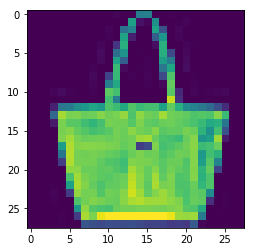

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline


train_df = pd.read_csv(r"fashion-mnist_train.csv")
test_df = pd.read_csv(r"fashion-mnist_test.csv")

train_df.head()

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

image = x_train[50, :].reshape((28, 28))
plt.imshow(image)
plt.show()




In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras import layers
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras import callbacks
from keras.utils import to_categorical
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = im_rows, im_cols, 1



In [0]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=im_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))             
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
x_train = x_train.reshape(x_train.shape[0],*im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)
y_validate = to_categorical(y_validate)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
ytest = y_test

print('x_train shape : {}'.format(x_train.shape))
print('y_train shape : {}'.format(y_train.shape))
print('x_test shape : {}'.format(x_test.shape))
print('y_test shape : {}'.format(y_test.shape))
print('x_validate shape : {}'.format(x_validate.shape))
print('y_validate shape {}'.format(y_validate.shape))

x_train shape : (48000, 28, 28, 1)
y_train shape : (48000, 10, 2)
x_test shape : (10000, 28, 28, 1)
y_test shape : (10000, 10)
x_validate shape : (12000, 28, 28, 1)
y_validate shape (12000, 10, 2)


In [0]:
tensorboard = TensorBoard(
    log_dir='./logs',
    write_graph=True,
    write_grads=True,
    histogram_freq=1,
    write_images=True,
)

H=model.fit(x_train, y_train, batch_size=batch_size,
              epochs=100, verbose=1,
              validation_data=(x_validate, y_validate),callbacks=[tensorboard]
              )

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 5s 103us/step - loss: 0.7043 - acc: 0.7381 - val_loss: 0.4231 - val_acc: 0.8469
Epoch 2/100
48000/48000 [==============================] - 2s 39us/step - loss: 0.4413 - acc: 0.8390 - val_loss: 0.3689 - val_acc: 0.8683
Epoch 3/100
48000/48000 [==============================] - 2s 37us/step - loss: 0.4013 - acc: 0.8531 - val_loss: 0.3310 - val_acc: 0.8814
Epoch 4/100
48000/48000 [==============================] - 2s 37us/step - loss: 0.3664 - acc: 0.8645 - val_loss: 0.3045 - val_acc: 0.8899
Epoch 5/100
48000/48000 [==============================] - 2s 38us/step - loss: 0.3537 - acc: 0.8681 - val_loss: 0.3078 - val_acc: 0.8901
Epoch 6/100
48000/48000 [==============================] - 2s 37us/step - loss: 0.3354 - acc: 0.8757 - val_loss: 0.2865 - val_acc: 0.8942
Epoch 7/100
48000/48000 [==============================] - 2s 37us/step -

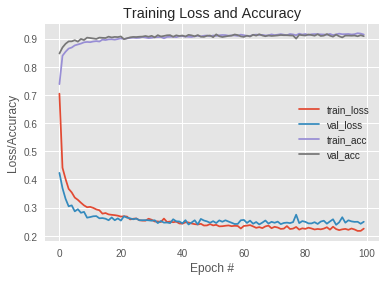

In [0]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()




In [0]:
score,acc = model.evaluate(x_test, y_test, verbose=1)
print(acc)

10000/10000 [==============================] - 1s 74us/step
0.9132


Coat


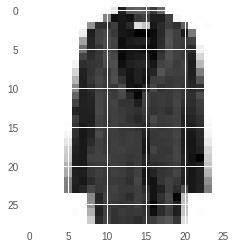

In [0]:
y_predict = model.predict(x_test)

label={    
0 :"T-shirt/top",
1 :"Trouser",
2 :"Pullover",
3 :"Dress",
4 :"Coat",
5 :"Sandal",
6 :"Shirt",
7 :"Sneaker",
8 :"Bag",
9 :"Ankle boot" 
}
def find_label(val):
    if val in label.keys():
        print(label[val])
    
find_label(y_predict[20].argmax())
plt.imshow(x_test[20].reshape(28, 28))



In [0]:
model.save('fmnist_model_trained.h5')

In [0]:
from keras.models import load_model

In [0]:
cnn_model=load_model('fmnist_model_trained.h5')

In [0]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                173088    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


In [0]:
labelNames = ["T-shirt/top", "Trouser", "Pullover", "dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [0]:

predictions = cnn_model.predict(x_test, batch_size=512)
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1), target_names=labelNames))

              precision    recall  f1-score   support

 T-shirt/top       0.90      0.85      0.87      1000
     Trouser       0.98      0.99      0.98      1000
    Pullover       0.90      0.86      0.88      1000
       dress       0.94      0.92      0.93      1000
        Coat       0.87      0.89      0.88      1000
      Sandal       0.99      0.96      0.98      1000
       Shirt       0.75      0.82      0.78      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.95      0.97      0.96      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [0]:
from sklearn.metrics import confusion_matrix

y_pred = cnn_model.predict(x_test)

In [0]:
y_test = np.argmax(y_test,axis=1)
print(y_predict)

In [0]:
y = cnn_model.predict_classes(x_test)
print(y)

[0 1 2 ... 8 8 1]


In [0]:
print(confusion_matrix(y_test,y))

[[847   0  18  10   3   0 111   0  11   0]
 [  2 987   2   3   2   0   3   0   1   0]
 [ 20   1 860   4  50   0  63   0   2   0]
 [  5   9   5 921  27   0  33   0   0   0]
 [  1   2  26  19 892   0  60   0   0   0]
 [  0   3   0   0   0 962   0  19   4  12]
 [ 66   1  44  23  43   0 816   0   7   0]
 [  0   0   0   0   0   5   0 962   0  33]
 [  2   3   1   0   2   2   3   2 984   1]
 [  0   0   0   0   1   2   0  23   0 974]]


(10000, 10)



Confusion Matrix: 
 [[847   0  18  10   3   0 111   0  11   0]
 [  2 987   2   3   2   0   3   0   1   0]
 [ 20   1 860   4  50   0  63   0   2   0]
 [  5   9   5 921  27   0  33   0   0   0]
 [  1   2  26  19 892   0  60   0   0   0]
 [  0   3   0   0   0 962   0  19   4  12]
 [ 66   1  44  23  43   0 816   0   7   0]
 [  0   0   0   0   0   5   0 962   0  33]
 [  2   3   1   0   2   2   3   2 984   1]
 [  0   0   0   0   1   2   0  23   0 974]]


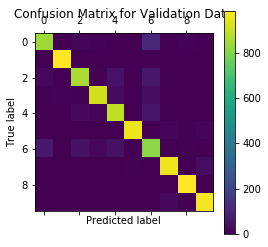

In [0]:
confmat = confusion_matrix(y_test,y)

print('\nConfusion Matrix: \n',confmat)

# Plot Confusion Matrix Data as a Matrix
plt.matshow(confmat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
import pandas as pd
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print(df_confusion)

Predicted    0    1    2    3    4    5    6    7    8    9
Actual                                                     
0          847    0   18   10    3    0  111    0   11    0
1            2  987    2    3    2    0    3    0    1    0
2           20    1  860    4   50    0   63    0    2    0
3            5    9    5  921   27    0   33    0    0    0
4            1    2   26   19  892    0   60    0    0    0
5            0    3    0    0    0  962    0   19    4   12
6           66    1   44   23   43    0  816    0    7    0
7            0    0    0    0    0    5    0  962    0   33
8            2    3    1    0    2    2    3    2  984    1
9            0    0    0    0    1    2    0   23    0  974


In [0]:
!pip install pandas-ml

    100% |████████████████████████████████| 102kB 3.3MB/s 


In [0]:
from pandas_ml import ConfusionMatrix

In [0]:
cm = ConfusionMatrix(y_actu, y_pred)
cm.print_stats('')

Confusion Matrix:

Predicted    0     1    2    3     4    5     6     7     8     9  __all__
Actual                                                                    
0          847     0   18   10     3    0   111     0    11     0     1000
1            2   987    2    3     2    0     3     0     1     0     1000
2           20     1  860    4    50    0    63     0     2     0     1000
3            5     9    5  921    27    0    33     0     0     0     1000
4            1     2   26   19   892    0    60     0     0     0     1000
5            0     3    0    0     0  962     0    19     4    12     1000
6           66     1   44   23    43    0   816     0     7     0     1000
7            0     0    0    0     0    5     0   962     0    33     1000
8            2     3    1    0     2    2     3     2   984     1     1000
9            0     0    0    0     1    2     0    23     0   974     1000
__all__    943  1006  956  980  1020  971  1089  1006  1009  1020    10000


Over

In [0]:
predicted = cnn_model.predict(x_test) 
misclass = np.abs(ytest - np.round(predicted))
classcheck = np.sum(misclass,axis=1)
np.where(classcheck >1)[0]

array([   5,   30,   41,   43,   51,   62,   72,   79,   91,   97,  101,
        103,  105,  116,  119,  126,  128,  138,  146,  196,  198,  217,
        227,  232,  239,  284,  295,  296,  303,  305,  313,  323,  354,
        366,  391,  396,  403,  410,  429,  430,  528,  532,  535,  564,
        604,  609,  612,  647,  656,  657,  703,  720,  755,  771,  786,
        787,  788,  819,  828,  833,  835,  842,  852,  868,  884,  925,
        932,  933,  947,  987,  994,  997, 1011, 1023, 1025, 1042, 1047,
       1071, 1091, 1098, 1113, 1132, 1139, 1150, 1160, 1161, 1165, 1169,
       1177, 1178, 1195, 1211, 1213, 1228, 1282, 1283, 1285, 1290, 1292,
       1300, 1308, 1312, 1314, 1315, 1323, 1324, 1329, 1343, 1346, 1351,
       1360, 1394, 1404, 1409, 1429, 1433, 1436, 1438, 1443, 1474, 1475,
       1536, 1556, 1557, 1564, 1567, 1571, 1585, 1616, 1640, 1652, 1664,
       1677, 1679, 1696, 1699, 1707, 1729, 1736, 1738, 1745, 1747, 1750,
       1760, 1774, 1779, 1792, 1806, 1846, 1857, 18

(10000, 10)